In [2]:
import sys
from pathlib import Path

# Add project root to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root))

Fraud Rate: 50.0000%


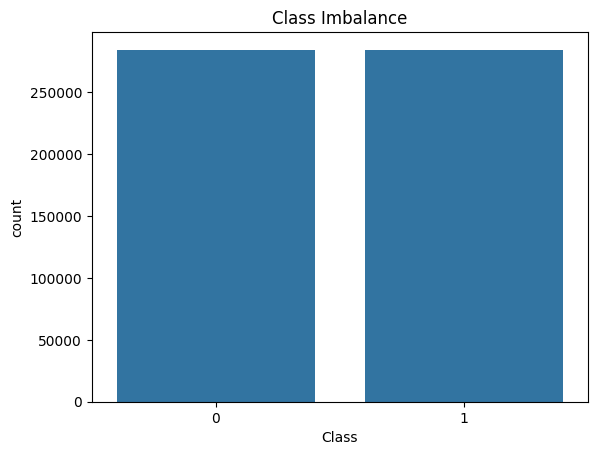

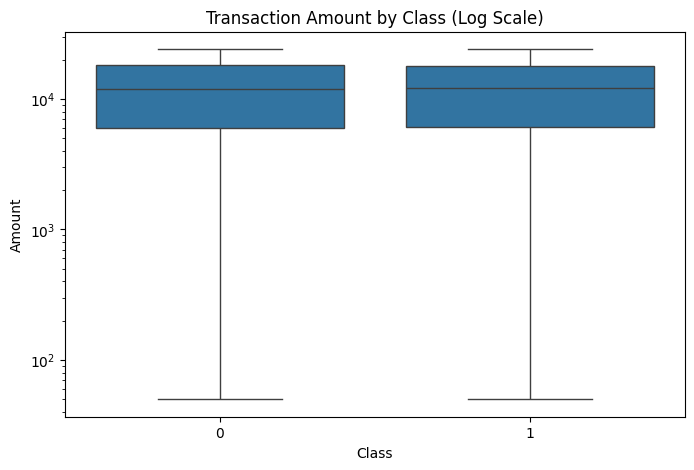

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import load_data

df = load_data("../data/creditcard2023.csv")

# Class distribution
fraud_rate = df["Class"].mean()
print(f"Fraud Rate: {fraud_rate:.4%}")

sns.countplot(x="Class", data=df)
plt.title("Class Imbalance")
plt.show()

# Amount distribution
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Amount", data=df)
plt.yscale("log")
plt.title("Transaction Amount by Class (Log Scale)")
plt.show()

Fraud transactions are not necessarily high-value; many are small and designed to evade detection.
This motivates probability-based detection rather than rule-based thresholds.

In [4]:
df["Class"].value_counts(normalize=True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

The dataset is intentionally balanced (50% fraud).
This project treats it as a benchmarking dataset and introduces controlled imbalance to simulate production conditions.

In [5]:
from src.utils import simulate_imbalance

df_1pct = simulate_imbalance(df, target_col="Class", fraud_rate=0.01)
df_5pct = simulate_imbalance(df, target_col="Class", fraud_rate=0.05)

print("1% fraud rate:", df_1pct["Class"].mean())
print("5% fraud rate:", df_5pct["Class"].mean())

1% fraud rate: 0.019606828941969166
5% fraud rate: 0.0909076375077539


To simulate production-like conditions, we artificially introduce class imbalance by downsampling fraudulent transactions while keeping all legitimate transactions intact.
This allows controlled study of model behavior under realistic fraud prevalence.